In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,
                                                    random_state=42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

##### reshape() 메소드는 n차원 배열을 m차원 배열로 바꿔준다. (n, m > 0)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [9]:
print(knr.predict([[500]]))
print(knr.predict([[1000]]))

[1033.33333333]
[1033.33333333]


##### length=500 이나 length=1000 K-최접근 이웃 회귀는 1033.3333을 가리킨다.


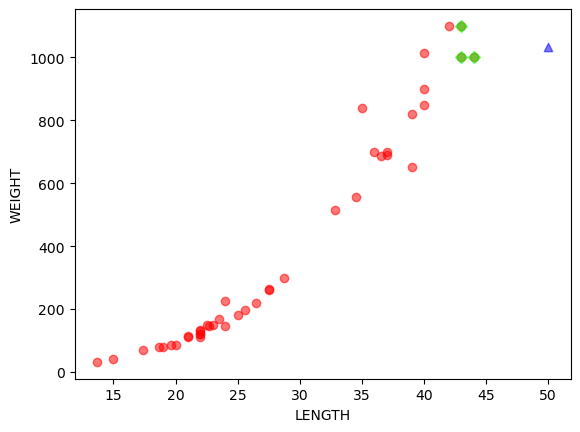

In [27]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])   ### [[50]]의 이웃을 구한다. 이웃 개수는 3개로 위에서 정했다.

plt.scatter(train_input, train_target, c="#FF000088")
plt.scatter(train_input[indexes], train_target[indexes], marker='D', c="#00FF0088")
plt.scatter(50, 1033.3333, marker='^', c='#0000FF88')
plt.xlabel('LENGTH')
plt.ylabel("WEIGHT")
plt.show()

In [26]:
print(np.mean(train_target[indexes]))

1033.3333333333333


# 선형 회귀 Linear Regression
#### 선형이란 말에서 짐작할 수 있듯이 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다.

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

lr.score(test_input, test_target)

0.8247503123313558

In [30]:
print(lr.predict([[50]]))   ### x축 50에 y축 무슨 값이 나올까?

[1241.83860323]


In [37]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


# y = ax + b 에서
#### a == coef_ / b == intercept_ 이다

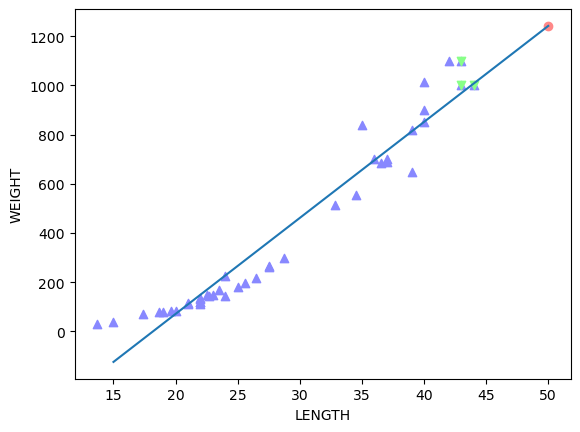

In [36]:
plt.scatter(train_input, train_target, marker='^', c='#8888FFFF')
plt.scatter(train_input[indexes], train_target[indexes], marker='v', c='#88FF88FF')
plt.scatter(50, 1241.8386, c='#FF8888FF')

plt.plot([15,50],[15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.xlabel('LENGTH')
plt.ylabel('WEIGHT')
plt.show()

##### 선형 회귀 장점 : 훈련세트의 범위에서 벗어난 값도 예측할 수 있다

In [38]:
train_input_polynomial = np.column_stack((train_input ** 2, train_input))
test_input_polynomial = np.column_stack((train_input ** 2, train_input))

##### y = ax^2 + bx + c 꼴로 나타내기 위해 배열을 조정

In [39]:
print(train_input_polynomial.shape, test_input_polynomial.shape)

(42, 2) (42, 2)


# #NOTICE
##### 2차 방정식 그래플르 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타겟값은 그대로 사용한다는 것이다.
##### 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다.

In [41]:
lr2 = LinearRegression()

lr2.fit(train_input_polynomial, train_target)

print(lr2.predict([[50**2, 50]]))

[1573.98423528]


In [43]:
print(lr2.coef_, lr2.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


##### 차례로 a계수, b계수 c계수

# #NOTICE
#### 2차 방정식은 비선형이 아닌가?
##### ax^2 + bx + c에서 x^2을 z라 치환하면 az +bx +c로 볼 수 있는데 이러면 선형 관계로 볼 수 있기 때문에 선형 회귀에 속한다.
### 이러한 다항식을 사용한 선형 회귀를 "다항 회귀"라 부른다.

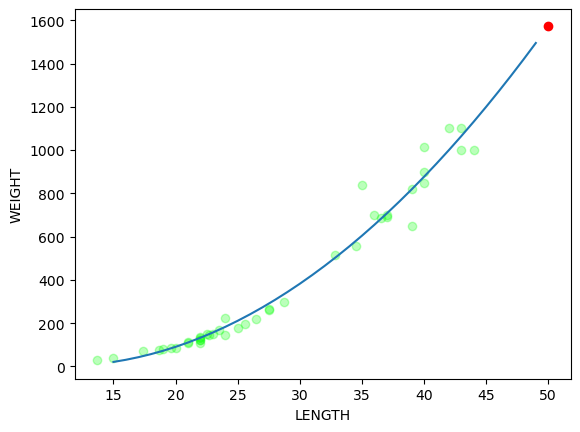

In [51]:
plt.scatter(train_input, train_target, c="#00FF0044")   ### input 데이터셋
plt.scatter(50, 1573.9842, c="#FF0000FF")   ### 예측할 점

plot_range = np.arange(15, 50)
plt.plot(plot_range, 1.01433211 * (plot_range ** 2) - 21.55792498 * plot_range + 116.05021078278259)
                    ### 2차 방정식 그리기
plt.xlabel("LENGTH")
plt.ylabel("WEIGHT")
plt.show()